 # Machine Learning LAB 1
 Academic Year 2021/22, P. Zanuttigh, U. Michieli, F. Barbato, D. Shenaj, G. Rizzoli

The notebook contains some simple tasks to be performed about classification and regression. Complete **all** the required code sections and answer to **all** the questions.

### IMPORTANT 1: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebook!


### IMPORTANT 2: Place your name and ID number. Also recall to save the file as Surname_Name_LAB1.ipynb . Notebooks without name will be discarded.

**Student name**: mario rossi<br>
**ID Number**: 1234567


# 1) Classification of Music genre

### Dataset description

A music genre is a conventional category that identifies pieces of music as belonging to a shared tradition or set of conventions. It is to be distinguished from musical form and musical style. The features extracted from these songs can help the machine to assing them to the two genres. 

This dataset is a subset of the dataset provided [here](https://www.kaggle.com/insiyeah/musicfeatures), containing only the data regarding the classical and metal genres.

### We consider 3 features for the classification

1) **tempo**, the speed at which a passage of music is played, i.e., the beats per minute of the musical piece<br>
2) **chroma_stft**, [mean chromagram activation on Short-Time Fourier Transform](https://librosa.org/doc/0.7.0/generated/librosa.feature.chroma_stft.html)<br>
3) **spectral_centroid**, Indicates where the "center of mass" of the spectrum is located, i.e., it is the weighted average of the frequency transform<br>


We first import all the packages that are needed.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv

import numpy as np
import scipy as sp
import sklearn as sl
from scipy import stats
from sklearn import datasets
from sklearn import linear_model

# Perceptron
Firstly we will implement the perceptron algorithm and use it to learn a halfspace.

**TO DO** Set the random seed, you can use your ID (matricola) or any other number! Try to make various tests changing the seed.

In [2]:
IDnumber = 5389267  #YOUR_ID , try also to change the seed to see the impact of random initialization on the results
np.random.seed(IDnumber)

Load the dataset and then split in training set and test set (the training set is typically larger, you can use a 75% tranining 25% test split) after applying a random permutation to the datset.

A) Load dataset and perform permutation

In [3]:
# Load the dataset
filename = 'data/music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',') #leggiamo il file

header = next(music) # skip first line
print(f"Header: {header}\n")

dataset = np.array(list(music))
print(f"Data shape: {dataset.shape}\n")
print("Dataset Example:")
print(dataset[:10,...])

X = dataset[:,:-1].astype(float) #columns 0,1,2 contain the features (prendiamo tutte le righe, e tutte le colonne tranne l'ultima)
Y = dataset[:,-1].astype(int)    # last column contains the labels (prendimo tutte le righe e solo l'ultima colonna)

Y = 2*Y-1                        # for the perceptron classical--> -1, metal-->1

m = dataset.shape[0] #restituisce il numero di righe, ossia il numero di samples
print("\nNumber of samples loaded:", m)
permutation =np.random.permutation(m) # random permutation

X = X[permutation]
Y = Y[permutation]


Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset Example:
[['92.28515625' '0.22373830597598895' '2192.798091164326' '0']
 ['161.4990234375' '0.2841730455239421' '1534.0649775815205' '0']
 ['143.5546875' '0.20811288763962318' '1396.8242648287155' '0']
 ['95.703125' '0.31289954089595506' '1680.0882644413368' '0']
 ['123.046875' '0.25857228884109024' '1173.6583080518985' '0']
 ['67.99958881578948' '0.22521197942744986' '715.1893204778178' '0']
 ['95.703125' '0.2840176228179304' '1184.632142061296' '0']
 ['89.10290948275862' '0.2563949682674902' '1358.897902739857' '0']
 ['99.38401442307692' '0.2614892978768399' '1372.8258066922585' '0']
 ['184.5703125' '0.2899787266101455' '1953.0485341566464' '0']]

Number of samples loaded: 200


We are going to classify class "1" (metal) vs class "-1" (classical)

B) **TO DO** Divide the data into training set and test set (75% of the data in the first set, 25% in the second one)

In [4]:
# Divide in training and test: make sure that your training set
# contains at least 10 elements from class 1 and at least 10 elements
# from class -1! If it does not, modify the code so to apply more random
# permutations (or the same permutation multiple times) until this happens.
# IMPORTANT: do not change the random seed.


# m_training needs to be the number of samples in the test set
m_training = int((75/100)*m)


# m_test needs to be the number of samples in the test set
m_test = int((25/100)*m)

# X_training = instances for training set
X_training = X[0:m_training,:]
#Y_training = labels for the training set
Y_training = Y[0:m_training]

# X_test = instances for test set
X_test = X[m_training:m,:]
# Y_test = labels for the test set
Y_test = Y[m_training:m]

print(Y_training) # to make sure that Y_training contains both 1 and -1
print("\nNumber of samples in the test set: ",m_test)

print("\nNumber of classical instances in test:", np.sum(Y_test==-1)) #sommo tutti gli elementi per cui il label è -1
print("Number of metal instances in test:", np.sum(Y_test==1)) ##sommo tutti gli elementi per cui il label è +1

print("Shape of training set: " + str(X_training.shape))
print("Shape of test set: " + str(X_test.shape))

[ 1 -1  1 -1 -1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1  1 -1  1  1  1 -1
 -1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1  1  1  1 -1 -1  1 -1  1 -1 -1 -1
 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1
  1  1 -1 -1 -1  1  1 -1  1  1  1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1
 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1  1  1 -1  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1  1 -1  1
  1 -1  1  1 -1  1]

Number of samples in the test set:  50

Number of classical instances in test: 23
Number of metal instances in test: 27
Shape of training set: (150, 3)
Shape of test set: (50, 3)


We add a 1 in front of each sample so that we can use a vector in homogeneous coordinates to describe all the coefficients of the model. This can be done with the function $hstack$ in $numpy$.

In [5]:
# Add a 1 to each sample (homogeneous coordinates) #aggiungiamo le coordinate omogenee agli array X delle features
X_training = np.hstack((np.ones((m_training,1)),X_training))
X_test = np.hstack((np.ones((m_test,1)),X_test))

print("Training set in homogeneous coordinates:")
print(X_training[:10])

Training set in homogeneous coordinates:
[[1.00000000e+00 1.43554688e+02 4.29968281e-01 2.64194366e+03]
 [1.00000000e+00 1.35999178e+02 1.87032426e-01 7.94918486e+02]
 [1.00000000e+00 1.35999178e+02 4.65477533e-01 2.38467428e+03]
 [1.00000000e+00 1.23046875e+02 2.68212987e-01 1.32925189e+03]
 [1.00000000e+00 9.57031250e+01 1.81161139e-01 1.80746118e+03]
 [1.00000000e+00 1.35999178e+02 3.81394246e-01 1.52762982e+03]
 [1.00000000e+00 9.57031250e+01 3.19468121e-01 1.71244608e+03]
 [1.00000000e+00 9.22851562e+01 5.02055322e-01 2.74339281e+03]
 [1.00000000e+00 1.07666016e+02 5.09240208e-01 2.70968208e+03]
 [1.00000000e+00 1.35999178e+02 4.69079028e-01 2.25428142e+03]]


**TO DO** Now complete the function *perceptron*. Since the perceptron does not terminate if the data is not linearly separable, your implementation should return the desired output (see below) if it reached the termination condition seen in class or if a maximum number of iterations have already been run, where one iteration corresponds to one update of the perceptron weights. In case the termination is reached because the maximum number of iterations have been completed, the implementation should return **the best model** seen up to now.

The input parameters to pass are:
- $X$: the matrix of input features, one row for each sample
- $Y$: the vector of labels for the input features matrix X
- $max\_num\_iterations$: the maximum number of iterations for running the perceptron

The output values are:
- $best\_w$: the vector with the coefficients of the best model
- $best\_error$: the *fraction* of misclassified samples for the best model

In [6]:
def perceptron_update(current_w, x, y, lr):
    new_w = current_w + lr*y*x
    return new_w

def perceptron(X, Y, lr, max_num_iterations):
    # Place in this function the main section of the perceptron algorithm
    
    #init the algorith with w=0, use a best_w variable to keep track of the best solution
    curr_w = np.zeros(X.shape[1]) #tanti pesi quante sono le features, ossia X.shape[1]
    best_w = np.zeros(X.shape[1])
    num_samples = 150
    best_error = 1
    
    index_misclassified = 0 
    num_misclassified = 0 
    
    
    #main loop continue until all samples correctly classified or max # iterations reached
    num_iter = 1
    
    while ((index_misclassified != -1) and (num_iter < max_num_iterations)):
        
        index_misclassified = -1
        num_misclassified = 0
        
        # avoid working always on the same sample, you can use a random permutation or randomize the choice of misclassified
        
        
        permutation = np.random.permutation(num_samples) 
        X = X[permutation]
        Y = Y[permutation]
        
        l = []
        number_of_misclassifications = []
        for i in range(num_samples):  #valuto la classificazione di tutti i samples 

            #check if the i-th randomly selected sample is misclassified (nel caso in cui la classificazione sia errata, aggiungo l'indice alla lista l)
            if Y[i]*(X[i].dot(curr_w)) <= 0:
                l.append(i)
                num_misclassified += 1 #aggiorno il numero di esempi non correttamente classificati
    
                
            # store the number of randomly classified samples and the index of at least one of them
           
            
        error = num_misclassified/num_samples  #dopo aver valutato tutti gli individui, calcolo l'errore
        number_of_misclassifications.append(num_misclassified)
        
            
        #keep track of best solution
        if error < best_error:
            best_error = error
            best_w = curr_w
        
        
        if num_misclassified != 0:  #nel caso in cui ci siano esempi non classificati correttamente, eseguo un update
            index_misclassified = l[np.random.randint(0,len(l))] #scelgo casualmente l'indice dell'esempio non correttamente classificato
            
        num_iter += 1 #aggiorno il numero di iterazioni
        
        #call update function using a misclassifed sample
        curr_w = perceptron_update(curr_w, X[index_misclassified], Y[index_misclassified],lr) #aggiorno i pesi
        
    
    return best_w, best_error, number_of_misclassifications

Now we use the implementation above of the perceptron to learn a model from the training data using 100 iterations and print the error of the best model we have found.

In [7]:
p = perceptron(X_training, Y_training, 0.1, 100)

print("Best error: ",round(p[1],3),"\n")
print("Best weights: ",p[0],"\n")



Best error:  0.1 

Best weights:  [-1.30000000e+00 -2.15864309e+02 -6.20549726e-02  1.50129482e+01] 



**TO DO** use the best model $w\_found$ to predict the labels for the test dataset and print the fraction of misclassified samples in the test set (the test error that is an estimate of the true loss).

In [8]:
#now use the w_found to make predictions on test dataset

def step_func(z):
    return 1.0 if (z > 0) else -1.0

num_errors = 0

for i in range(m_test):
    if Y_test[i] !=  step_func(np.dot(X_test[i],p[0])):
        num_errors +=1
                                
    

true_loss_estimate = num_errors/m_test  # error rate on the test set
#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Test Error of perpceptron (100 iterations): ", round(true_loss_estimate,3))

Test Error of perpceptron (100 iterations):  0.28


**TO DO** **[Answer the following]** What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples)? Explain what you observe. [Write the answer in this cell]

**ANSWER QUESTION 1**  The error on the test set is higher than the error on the training set (which has been calculated in the previous as "best error") . I have repeted the test several times, and I have noticed that, after 100 iterations, the test error value is between 2.7 and 2.9 times higher than the training error.  

 **TO DO** Copy the code from the last 2 cells above in the cell below and repeat the training with 4000 iterations. Then print the error in the training set and the estimate of the true loss obtained from the test set.

In [9]:
#now run the perceptron for 3000 iterations here!

p2 = perceptron(X_training, Y_training, 0.1, 4000)

print("Training Error of perpceptron (4000 iterations): " + str(round(p2[1],3)))


num_errors2 = 0
for i in range(m_test):
    if Y_test[i] !=  step_func(np.dot(X_test[i],p2[0])):
        num_errors2 +=1
                                
    
true_loss_estimate2 = num_errors2/m_test  # error rate on the test set
print("Test Error of perpceptron (4000 iterations): " + str(true_loss_estimate2))

Training Error of perpceptron (4000 iterations): 0.08
Test Error of perpceptron (4000 iterations): 0.22


**TO DO** [Answer the following] What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples) when running for a larger number of iterations ? Explain what you observe and compare with the previous case. [Write the answer in this cell]

**ANSWER QUESTION 2** Implementing 4000 iterations the training error and the test error have decreased, whereas their ratio hasn't decreased.       
I expected this result, in fact implementing an higher number of iterations, the perceptron has more possibilities to improve.


# Logistic Regression
Now we use logistic regression, exploiting the implementation in Scikit-learn, to predict labels. We will also plot the decision region of logistic regression.

We first load the dataset again.

In [10]:
# Load the dataset
filename = 'data/music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',')

header = next(music) # skip first line
print(f"Header: {header}\n")

dataset = np.array(list(music))
print(f"Data shape: {dataset.shape}\n")
print("Dataset Example:")
print(dataset[:10,...])

X = dataset[:,:-1].astype(float) # columns 0,1,2 contain the features
Y = dataset[:,-1].astype(int)    # last column contains the labels


Y = 2*Y-1                    # for the perceprton classical--> -1, metal-->1 #in questo modo i label non sono più 0/1 ma -1/1
m = dataset.shape[0]
print("\nNumber of samples loaded:", m)
permutation = np.random.permutation(m) # random permutation

#eseguiamo uno shuffledei label
X = X[permutation]
Y = Y[permutation]



Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset Example:
[['92.28515625' '0.22373830597598895' '2192.798091164326' '0']
 ['161.4990234375' '0.2841730455239421' '1534.0649775815205' '0']
 ['143.5546875' '0.20811288763962318' '1396.8242648287155' '0']
 ['95.703125' '0.31289954089595506' '1680.0882644413368' '0']
 ['123.046875' '0.25857228884109024' '1173.6583080518985' '0']
 ['67.99958881578948' '0.22521197942744986' '715.1893204778178' '0']
 ['95.703125' '0.2840176228179304' '1184.632142061296' '0']
 ['89.10290948275862' '0.2563949682674902' '1358.897902739857' '0']
 ['99.38401442307692' '0.2614892978768399' '1372.8258066922585' '0']
 ['184.5703125' '0.2899787266101455' '1953.0485341566464' '0']]

Number of samples loaded: 200


**TO DO** As for the previous part, divide the data into training and test (75%-25%) and add a 1 as first component to each sample.

In [11]:
#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.
#IMPORTANT: do not change the random seed.

m_training = int((75/100)*m)
m_test =  int((25/100)*m)

# X_training = instances for training set
X_training = X[0:m_training,:]
#Y_training = labels for the training set
Y_training = Y[0:m_training]

# X_test = instances for test set
X_test = X[m_training:m,:]
# Y_test = labels for the test set
Y_test = Y[m_training:m]

print("Number of samples in the training set:", m_training)
print("Number of samples in the test set:", m_test)
print("\nNumber of classical instances in test:", np.sum(Y_test==-1))
print("Number of metal instances in test:", np.sum(Y_test==1))

print("\nShape of training set: " + str(X_training.shape))
print("Shape of test set: " + str(X_test.shape))

Number of samples in the training set: 150
Number of samples in the test set: 50

Number of classical instances in test: 24
Number of metal instances in test: 26

Shape of training set: (150, 3)
Shape of test set: (50, 3)


To define a logistic regression model in Scikit-learn use the instruction

$linear\_model.LogisticRegression(C=1e5)$

($C$ is a parameter related to *regularization*, a technique that
we will see later in the course. Setting it to a high value is almost
as ignoring regularization, so the instruction above corresponds to the
logistic regression you have seen in class.)

To learn the model you need to use the $fit(...)$ instruction and to predict you need to use the $predict(...)$ function. See the Scikit-learn documentation for how to use it.

**TO DO** Define the logistic regression model, then learn the model using the training set and predict on the test set. Then print the fraction of samples misclassified in the training set and in the test set.

In [12]:
#part on logistic regression for 2 classes
logreg = linear_model.LogisticRegression(C=1e5) #a large C disables regularization

#learn from training set
logreg.fit(X_training, Y_training)


#predict on training set
y_pred_training = logreg.predict(X_training)

#print the error rate = fraction of misclassified samples
error_rate_training = 0

for i in range(m_training):
    if y_pred_training[i] != Y_training[i]:
        error_rate_training += 1
        
error_rate_training = error_rate_training/m_training
print("Error rate on training set: "+str(error_rate_training))


#############################################################

#predict on test set
y_pred_test = logreg.predict(X_test)

#print the error rate = fraction of misclassified samples
error_rate_test = 0

for i in range(m_test):
    if y_pred_test[i] != Y_test[i]:
        error_rate_test += 1
        
error_rate_test = error_rate_test/m_test
print("Error rate on test set: " + str(error_rate_test))

Error rate on training set: 0.006666666666666667
Error rate on test set: 0.0


**TO DO** Now pick two features and restrict the dataset to include only two features, whose indices are specified in the $feature$ vector below. Then split into training and test. Which features are you going to select ?

In [13]:
# to make the plot we need to reduce the data to 2D, so we choose two features
features_list = ['tempo', 'chroma_stft', 'spectral_centroid']

### tempo & chroma_stft

In [14]:
index_feature1 = 0
index_feature2 = 1
features = [index_feature1, index_feature2]


#consideriamo solo le features di "features_list" che ci interessano
feature_name0 = features_list[features[0]]
feature_name1 = features_list[features[1]]

print("Choosed Features: ",feature_name0,",",feature_name1)

#print(feature_name0)
#print(feature_name1)


X_reduced1 = X[:,features] #tutte le righe e solo le colonne selezionate

#Y = dataset[:,-1].astype(int)   # last column contains the labels
#Y = 2*Y-1 #trasformo i label in 1 e -1


m_training = int((75/100)*m)
m_test =  int((25/100)*m)


# X_training = instances for training set
X_training1 = X_reduced1[0:m_training,:]
#Y_training = labels for the training set
#Y_training = Y[0:m_training]

# X_test = instances for test set
X_test1 = X_reduced1[m_training:m,:]
# Y_test = labels for the test set
#Y_test = Y[m_training:m]


Choosed Features:  tempo , chroma_stft


Now learn a model using the training data and measure the performances.

In [15]:
# learning from training data
logreg.fit(X_training1, Y_training)

#print the error rate = fraction of misclassified samples
y_pred1 = logreg.predict(X_test1)

error_rate_test1 = 0
for i in range(m_test):
    if y_pred1[i] != Y_test[i]:
        error_rate_test1 += 1
        
error_rate_test1 = error_rate_test1/m_test


print("Error rate on test set: " + str(error_rate_test1))

Error rate on test set: 0.06


### tempo & spectral_centroid

In [16]:
index_feature1 = 0
index_feature2 = 2
features = [index_feature1, index_feature2]

#consideriamo solo le features di "features_list" che ci interessano
feature_name0 = features_list[features[0]]
feature_name1 = features_list[features[1]]


X_reduced2 = X[:,features] #tutte le righe e solo le colonne selezionate

#Y = dataset[:,-1].astype(int)   # last column contains the labels
#Y = 2*Y-1


#m_training = int((75/100)*m)
#m_test =  int((25/100)*m)


# X_training = instances for training set
X_training2 = X_reduced2[0:m_training,:]
#Y_training = labels for the training set
#Y_training = Y[0:m_training]

# X_test = instances for test set
X_test2 = X_reduced2[m_training:m,:]
# Y_test = labels for the test set
#Y_test = Y[m_training:m]

In [17]:
# learning from training data
logreg.fit(X_training2, Y_training)

#print the error rate = fraction of misclassified samples
y_pred2 = logreg.predict(X_test2)

error_rate_test2 = 0
for i in range(m_test):
    if y_pred2[i] != Y_test[i]:
        error_rate_test2 += 1
        
error_rate_test2 = error_rate_test2/m_test


print("Error rate on test set: " + str(error_rate_test2))

Error rate on test set: 0.06


## chroma_stft & spectral_centroid

In [18]:
index_feature1 = 1
index_feature2 = 2
features = [index_feature1, index_feature2]

#consideriamo solo le features di "features_list" che ci interessano
feature_name0 = features_list[features[0]]
feature_name1 = features_list[features[1]]


X_reduced3 = X[:,features] #tutte le righe e solo le colonne selezionate

#Y = dataset[:,-1].astype(int)   # last column contains the labels
#Y = 2*Y-1


#m_training = int((75/100)*m)
#m_test =  int((25/100)*m)


# X_training = instances for training set
X_training3 = X_reduced3[0:m_training,:]
#Y_training = labels for the training set
#Y_training = Y[0:m_training]

# X_test = instances for test set
X_test3 = X_reduced3[m_training:m,:]
# Y_test = labels for the test set
#Y_test = Y[m_test:m]

In [19]:
# learning from training data
logreg.fit(X_training3, Y_training)

#print the error rate = fraction of misclassified samples
y_pred3 = logreg.predict(X_test3)

error_rate_test3 = 0
for i in range(m_test):
    if y_pred3[i] != Y_test[i]:
        error_rate_test += 1
        
error_rate_test3 = error_rate_test3/m_test
print("Error rate on test set: " + str(error_rate_test3))

Error rate on test set: 0.0


**TO DO** [Answer the following] Which features did you select and why ? Compare the perfromances with the ones of the case with all the 3 features and comment about the results. [Write the answer in this cell]

**ANSWER QUESTION 3** I compared all the possible features couples: (tempo and chroma_stft)  /  (tempo and spectral centroid)  /  (chroma_stft and spectral centroid). I choosed the couple that returned the lowest error. The best couple is formed by  chroma_stft and spectral_centroid features, that returned a 0.0 error. This result is better than the one obtained using all three features.

If everything is ok, the code below uses the model in $logreg$ to plot the decision region for the two features chosen above, with colors denoting the predicted value. It also plots the points (with correct labels) in the training set. It makes a similar plot for the test set.

# PLOT chroma_stft & spectral_centroid

<ipython-input-20-85d4e1a09f22>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


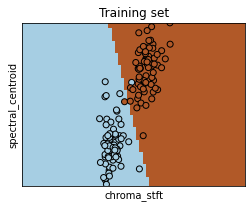

<ipython-input-20-85d4e1a09f22>:36: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


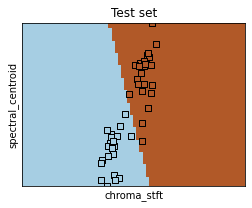

In [20]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# NOTICE: This visualization code has been developed for a "standard" solution of the notebook, 
# it could be necessary to make some fixes to adapt to your implementation

h = .02  # step size in the mesh
x_min, x_max = X_reduced3[:, 0].min() - .5, X_reduced3[:, 0].max() + .5
y_min, y_max = X_reduced3[:, 1].min() - .5, X_reduced3[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_training3[:, 0], X_training3[:, 1], c=Y_training, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel("chroma_stft")
plt.ylabel("spectral_centroid")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Training set')

plt.show()

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the test points 
plt.scatter(X_test3[:, 0], X_test3[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired, marker='s')
plt.xlabel("chroma_stft")
plt.ylabel("spectral_centroid")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Test set')

plt.show()

# 2) Linear Regression on the Boston House Price dataset

### Dataset description: 

The Boston House Price Dataset involves the prediction of a house price in thousands of dollars given details about the house and its neighborhood.

The dataset contains a total of 500 observations, which relate 13 input features to an output variable (house price).

The variable names are as follows:

CRIM: per capita crime rate by town.

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of nonretail business acres per town.

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX: nitric oxides concentration (parts per 10 million).

RM: average number of rooms per dwelling.

AGE: proportion of owner-occupied units built prior to 1940.

DIS: weighted distances to five Boston employment centers.

RAD: index of accessibility to radial highways.

TAX: full-value property-tax rate per $10,000.

PTRATIO: pupil-teacher ratio by town.

B: 1000*(Bk – 0.63)2 where Bk is the proportion of blacks by town.

LSTAT: % lower status of the population.

MEDV: Median value of owner-occupied homes in $1000s.
    

In [21]:
#needed if you get the IPython/javascript error on the in-line plots
%matplotlib nbagg  
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats
from sklearn.metrics import mean_squared_error

In [22]:
#Import Data: Load the data from a .csv file

filename = "data/house.csv"
BostonData = np.genfromtxt(filename, delimiter=';',skip_header=1)

#A quick overview of data, to inspect the data you can use the method describe()


dataDescription = stats.describe(BostonData)
print(dataDescription)
print ("\nShape of data array: " + str(BostonData.shape))


#for more interesting visualization: use Panda!

DescribeResult(nobs=500, minmax=(array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
       3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8700e+02,
       1.2600e+01, 3.2000e-01, 1.7300e+00, 5.0000e+01]), array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  , 500.    ])), mean=array([3.65578576e+00, 1.15000000e+01, 1.11317400e+01, 7.00000000e-02,
       5.54451400e-01, 6.28297000e+00, 6.84246000e+01, 3.81193180e+00,
       9.64200000e+00, 4.09624000e+02, 1.84286000e+01, 3.56208040e+02,
       1.26987400e+01, 2.25680000e+02]), variance=array([7.47252195e+01, 5.48905812e+02, 4.76198228e+01, 6.52304609e-02,
       1.35838329e-02, 4.97618330e-01, 7.99314163e+02, 4.46304043e+00,
       7.59617595e+01, 2.85605197e+04, 4.67663531e+00, 8.41657137e+03,
       5.13361942e+01, 8.52982926e+03]), skewness=array([ 5.17851447,  2.19924065,  0.29469001,  3.37060575,  0.72944382,
        0

# Split data in training and test sets



Given $m$ total data, denote with $m_{t}$ the part used for training. Keep $m_t$ data as training data, and $m_{test}:= m-m_{t}$. For instance one can take $m_t=0.7m$ of the data as training and $m_{test}=0.3m$ as testing. Let us define as define

$\bullet$ $S_{t}$ the training data set

$\bullet$ $S_{test}$ the testing data set


The reason for this splitting is as follows:

TRAINING DATA: The training data are used to compute the empirical loss
$$
L_S(h) = \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
which is used to estimate $h$ in a given model class ${\cal H}$.
i.e. 
$$
\hat{h} = {\rm arg\; min}_{h \in {\cal H}} \, L_S(h)
$$

TESTING DATA: The test data set can be used to estimate the performance of the final estimated model
$\hat h_{\hat d_j}$ using:
$$
L_{{\cal D}}(\hat h_{\hat d_j}) \simeq \frac{1}{m_{test}} \sum_{ z_i \in S_{test}} \ell(\hat h_{\hat d_j},z_i)
$$


**TO DO**: split the data in training and test sets (70%-30%)

In [23]:
#get number of total samples
num_total_samples = BostonData.shape[0]

print ("Total number of samples: ", num_total_samples)

m_t = int(num_total_samples*.7) #training samples 
m_test = (num_total_samples - m_t) #test samples

print ("Cardinality of Training Set: ", m_t)

#shuffle the data
np.random.shuffle(BostonData)


X = BostonData[:,:-1]
Y = BostonData[:,-1]

#training data 
X_training = X[0:m_t,:]
Y_training = Y[0:m_t]

print ("Training input data size: ", X_training.shape)
print ("Training output data size: ", Y_training.shape)


#test data, to be used to estimate the true loss of the final model(s)
X_test = X[m_t:,:]
Y_test = Y[m_t:]
print ("Test input data size: ", X_test.shape)
print ("Test output data size: ", Y_test.shape)

Total number of samples:  500
Cardinality of Training Set:  350
Training input data size:  (350, 13)
Training output data size:  (350,)
Test input data size:  (150, 13)
Test output data size:  (150,)


# Data Normalization
It is common practice in Statistics and Machine Learning to scale the data (= each variable) so that it is centered (zero mean) and has standard deviation equal to 1. This helps in terms of numerical conditioning of the (inverse) problems of estimating the model (the coefficients of the linear regression in this case), as well as to give the same scale to all the coefficients.

In [24]:
# scale the data

# standardize the input matrix
from sklearn import preprocessing
# the transformation is computed on training data and then used on all the 3 sets
scaler = preprocessing.StandardScaler().fit(X_training) 

np.set_printoptions(suppress=True) # sets to zero floating point numbers < min_float_eps
X_training = scaler.transform(X_training)
print ("\nMean of the training input data:", X_training.mean(axis=0))
print ("\nStd of the training input data:",X_training.std(axis=0))

X_test = scaler.transform(X_test) # use the same transformation on test data
print ("\nMean of the test input data:", X_test.mean(axis=0))
print ("\nStd of the test input data:", X_test.std(axis=0))


Mean of the training input data: [-0.  0.  0. -0. -0.  0. -0.  0. -0.  0.  0.  0.  0.]

Std of the training input data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Mean of the test input data: [-0.01578234 -0.12564371  0.16569542  0.01884232  0.11423307 -0.09000268
  0.08173995 -0.18303624  0.13951291  0.17809077  0.10308811 -0.20877741
 -0.00306524]

Std of the test input data: [0.96452067 0.88799181 0.93595839 1.03149258 0.98621833 0.97769081
 0.96033765 0.87000375 1.04163013 1.01190572 0.92069339 1.2983558
 0.98946468]


# Model Training 

The model is trained (= estimated) minimizing the empirical error
$$
L_S(h) := \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
When the loss function is the quadratic loss
$$
\ell(h,z) := (y - h(x))^2
$$
we define  the Residual Sum of Squares (RSS) as
$$
RSS(h):= \sum_{z_i \in S_{t}} \ell(h,z_i) = \sum_{z_i \in S_{t}} (y_i - h(x_i))^2
$$ so that the training error becomes
$$
L_S(h) = \frac{RSS(h)}{m_t}
$$

We recal that, for linear models we have $h(x) = <w,x>$ and the Empirical error $L_S(h)$ can be written
in terms of the vector of parameters $w$ in the form
$$
L_S(w) = \frac{1}{m_t} \|Y - X w\|^2
$$
where $Y$ and $X$ are the matrices whose $i-$th row are, respectively, the output data $y_i$ and the input vectors $x_i^\top$.


 **TO DO:** compute the linear regression coefficients using np.linalg.lstsq from scikitlearn 
 

In [25]:
from scipy import linalg
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [26]:
#compute linear regression coefficients for training data

#add a 1 at the beginning of each sample for training, and testing (use homogeneous coordinates)
m_training = X_training.shape[0]
X_trainingH = np.hstack((np.ones((m_training,1)),X_training)) # H: in homogeneous coordinates

m_test = X_test.shape[0]
X_testH = np.hstack((np.ones((m_test,1)),X_test))  # H: in homogeneous coordinates

# Compute the least-squares coefficients using linalg.lstsq
w_np, RSStr_np, rank_Xtr, sv_Xtr =  linalg.lstsq(X_trainingH, Y_training)
print("LS coefficients with numpy lstsq:", w_np)

y_pred_training = np.dot(X_trainingH, w_np)

# compute Residual sums of squares
RSS = ((y_pred_training-Y_training)**2).sum()

print("\nRSS with numpy lstsq: ", RSStr_np)
print("RSS by hand: ", RSS)
print("As you can notice, the values of RSS with numpy lstsq and RSS by hand are the same")
print("\nEmpirical risk with numpy lstsq:", RSStr_np/m_training)

LS coefficients with numpy lstsq: [225.80571429 -11.43249523  11.44437821  -0.02241221   0.78417921
 -19.97020137  33.21998447  -3.28850688 -31.88058501  23.03511612
 -24.30143694 -19.75487721   5.77747452 -26.24476062]

RSS with numpy lstsq:  602938.2758924671
RSS by hand:  602938.2758924671
As you can notice, the values of RSS with numpy lstsq and RSS by hand are the same

Empirical risk with numpy lstsq: 1722.6807882641917


## Data prediction 

Compute the output predictions on both training and test set and compute the Residual Sum of Squares (RSS). 

**TO DO**: Compute these quantities on  training and test sets.

In [27]:
#compute predictions on training and test
model = LinearRegression()

model.fit(X_trainingH, Y_training)

prediction_training = model.predict(X_trainingH)

prediction_test = model.predict(X_testH)



#what about the loss for points in the test data?

RSS_training = ((Y_training - prediction_training)**2).sum()
RSS_test = ((Y_test - prediction_test)**2).sum()

print("RSS on training data:", RSS_training)
print("Loss estimated from training data:", RSS_training/m_training)
print("\n")
print("RSS on test data:", RSS_test)
print("Loss estimated from test data:", RSS_test/m_test)

RSS on training data: 602938.2758924672
Loss estimated from training data: 1722.6807882641922


RSS on test data: 548850.7615493344
Loss estimated from test data: 3659.005076995563


### QUESTION 4: Comment on the results you get and on the difference between the train and test errors.

The loss estimated on the training set is better than the loss estimated on the test set. Infact the loss estimated on the test set is the double of the loss estimated on the training set. I Expect large values in regression error loss, so these obtained values are acceptables

 

## Ordinary Least-Squares using scikit-learn
Another fast way to compute the LS estimate is through sklearn.linear_model (for this function homogeneous coordinates are not needed).

In [28]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# build the LinearRegression() model and train it
model = LinearRegression()

model.fit(X_training, Y_training)

print("Intercept:", model.intercept_)
print("\n")
print("Least-Squares Coefficients:", model.coef_) #per ciascuna feature abbiamo un coefficiente

# predict output values on training and test sets

y_pred_training = model.predict(X_training)
y_pred_test = model.predict(X_test)


# return a prediction score based on the coefficient of determination
print("\nMeasure on training data:", 1-model.score(X_training, Y_training)) #coefficiente  di determinazione (R2)
print("Measure on test data:", 1-model.score(X_test, Y_test))

Intercept: 225.8057142857144


Least-Squares Coefficients: [-11.43249523  11.44437821  -0.02241221   0.78417921 -19.97020137
  33.21998447  -3.28850688 -31.88058501  23.03511612 -24.30143694
 -19.75487721   5.77747452 -26.24476062]

Measure on training data: 0.21607540461910446
Measure on test data: 0.3743969284919251


# PERCEPTRON USING NORMALIZATION DATASET


In this case I have implemented the perceptron in the previous same way, whereas the dataset for training and testing has been normalized.
I normalized the training and the test data separately, to avoid any influences between train and test data

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv

import numpy as np
import scipy as sp
import sklearn as sl
from scipy import stats
from sklearn import datasets
from sklearn import linear_model

In [30]:
IDnumber = 5389267  #YOUR_ID , try also to change the seed to see the impact of random initialization on the results
np.random.seed(IDnumber)

Load the dataset and then split in training set and test set (the training set is typically larger, you can use a 75% tranining 25% test split) after applying a random permutation to the datset.

A) Load dataset and perform permutation

In [31]:
# Load the dataset
filename = 'data/music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',') #leggiamo il file

#header = next(music) # skip first line
#print(f"Header: {header}\n")

dataset = np.array(list(music))
#print(f"Data shape: {dataset.shape}\n")
#print("Dataset Example:")
#print(dataset[:10,...])

X = dataset[1:,:-1].astype(float) #columns 0,1,2 contain the features (prendiamo tutte le righe, e tutte le colonne tranne l'ultima)


#X_norm = (X - X.min())/(X.max()-X.min())

#wines_norm = (wines_norm - wines_norm.min())/(wines_norm.max()- wines_norm.min())


Y = dataset[1:,-1].astype(int)   # last column contains the labels (prendimo tutte le righe e solo l'ultima colonna)


Y = 2*Y-1                        # for the perceptron classical--> -1, metal-->1


m = X.shape[0] #restituisce il numero di righe, ossia il numero di samples
print("\nNumber of samples loaded:", m)



permutation =np.random.permutation(m) # random permutation

X = X[permutation]
Y = Y[permutation]


Number of samples loaded: 200


We are going to classify class "1" (metal) vs class "-1" (classical)

B) **TO DO** Divide the data into training set and test set (75% of the data in the first set, 25% in the second one)

In [32]:
# Divide in training and test: make sure that your training set
# contains at least 10 elements from class 1 and at least 10 elements
# from class -1! If it does not, modify the code so to apply more random
# permutations (or the same permutation multiple times) until this happens.
# IMPORTANT: do not change the random seed.


# m_training needs to be the number of samples in the test set
m_training = int((75/100)*m)


# m_test needs to be the number of samples in the test set
m_test = int((25/100)*m)

# X_training = instances for training set
X_training = X[0:m_training,:]
#Y_training = labels for the training set
Y_training = Y[0:m_training]

# X_test = instances for test set
X_test = X[m_training:m,:]
# Y_test = labels for the test set
Y_test = Y[m_training:m]

#print(Y_training) # to make sure that Y_training contains both 1 and -1
#print("\nNumber of samples in the test set: ",m_test)

print("\nNumber of classical instances in test:", np.sum(Y_test==-1)) #sommo tutti gli elementi per cui il label è -1
print("Number of metal instances in test:", np.sum(Y_test==1)) ##sommo tutti gli elementi per cui il label è +1

print("Shape of training set: " + str(X_training.shape))
print("Shape of test set: " + str(X_test.shape))


Number of classical instances in test: 23
Number of metal instances in test: 27
Shape of training set: (150, 3)
Shape of test set: (50, 3)


# Here I normalize independently the training test and the test set, beacuse I don't want to influence the test set with the data of the training set

In [33]:
X_norm_training = (X_training - X_training.min())/(X_training.max()- X_training.min())
X_norm_test = (X_test - X_test.min())/(X_test.max()- X_test.min())
print(X_norm_training[:10,:])
print("\n")
print(X_norm_test[:10,:])

[[0.04213249 0.00007312 0.77632208]
 [0.03991219 0.00000173 0.23354565]
 [0.03991219 0.00008355 0.70071956]
 [0.03610596 0.00002558 0.39056764]
 [0.02807058 0.         0.53109671]
 [0.03991219 0.00005884 0.44886401]
 [0.02807058 0.00004064 0.50317508]
 [0.02706616 0.0000943  0.80613445]
 [0.03158606 0.00009641 0.79622804]
 [0.03991219 0.00008461 0.66240163]]


[[0.03424748 0.00000883 0.30578664]
 [0.03281775 0.00008938 0.82753866]
 [0.02916398 0.00002942 0.51307491]
 [0.03939453 0.00007886 0.7324541 ]
 [0.04147141 0.00012816 0.93081559]
 [0.04377905 0.000015   0.34749359]
 [0.03028822 0.00007671 0.74597902]
 [0.03751545 0.00001755 0.41825243]
 [0.03028822 0.0000853  0.81181021]
 [0.04147141 0.00002338 0.59027723]]


We add a 1 in front of each sample so that we can use a vector in homogeneous coordinates to describe all the coefficients of the model. This can be done with the function  ℎ𝑠𝑡𝑎𝑐𝑘  in  𝑛𝑢𝑚𝑝𝑦 .

In [34]:
# Add a 1 to each sample (homogeneous coordinates) #aggiungiamo le coordinate omogenee agli array X delle features
X_norm_training = np.hstack((np.ones((m_training,1)),X_norm_training))
X_norm_test = np.hstack((np.ones((m_test,1)),X_norm_test))

print("Training set in homogeneous coordinates:")
print(X_norm_training[:10,:])

Training set in homogeneous coordinates:
[[1.         0.04213249 0.00007312 0.77632208]
 [1.         0.03991219 0.00000173 0.23354565]
 [1.         0.03991219 0.00008355 0.70071956]
 [1.         0.03610596 0.00002558 0.39056764]
 [1.         0.02807058 0.         0.53109671]
 [1.         0.03991219 0.00005884 0.44886401]
 [1.         0.02807058 0.00004064 0.50317508]
 [1.         0.02706616 0.0000943  0.80613445]
 [1.         0.03158606 0.00009641 0.79622804]
 [1.         0.03991219 0.00008461 0.66240163]]


**TO DO** Now complete the function *perceptron*. Since the perceptron does not terminate if the data is not linearly separable, your implementation should return the desired output (see below) if it reached the termination condition seen in class or if a maximum number of iterations have already been run, where one iteration corresponds to one update of the perceptron weights. In case the termination is reached because the maximum number of iterations have been completed, the implementation should return **the best model** seen up to now.

The input parameters to pass are:
- $X$: the matrix of input features, one row for each sample
- $Y$: the vector of labels for the input features matrix X
- $max\_num\_iterations$: the maximum number of iterations for running the perceptron

The output values are:
- $best\_w$: the vector with the coefficients of the best model
- $best\_error$: the *fraction* of misclassified samples for the best model

In [35]:
def perceptron_update(current_w, x, y, lr):
    new_w = current_w + lr*y*x
    return new_w

def perceptron_norm(X, Y, lr, max_num_iterations):
    # Place in this function the main section of the perceptron algorithm
    
    #init the algorith with w=0, use a best_w variable to keep track of the best solution
    curr_w = np.zeros(X.shape[1]) #tanti pesi quante sono le features, ossia X.shape[1]
    best_w = np.zeros(X.shape[1])
    num_samples = 150
    best_error = 1
    
    index_misclassified = 0 
    num_misclassified = 0 
    
    
    #main loop continue until all samples correctly classified or max # iterations reached
    num_iter = 1
    
    while ((index_misclassified != -1) and (num_iter < max_num_iterations)):
        
        index_misclassified = -1
        num_misclassified = 0
        
        # avoid working always on the same sample, you can use a random permutation or randomize the choice of misclassified
        
        
        permutation = np.random.permutation(num_samples) 
        X = X[permutation]
        Y = Y[permutation]
        
        l = []
        number_of_misclassifications = []
        for i in range(num_samples):  #valuto la classificazione di tutti i samples 

            #check if the i-th randomly selected sample is misclassified (nel caso in cui la classificazione sia errata, aggiungo l'indice alla lista l)
            if Y[i]*(X[i].dot(curr_w)) <= 0:
                l.append(i)
                num_misclassified += 1 #aggiorno il numero di esempi non correttamente classificati
    
                
            # store the number of randomly classified samples and the index of at least one of them
           
            
        error = num_misclassified/num_samples  #dopo aver valutato tutti gli individui, calcolo l'errore
        number_of_misclassifications.append(num_misclassified)
        
            
        #keep track of best solution
        if error < best_error:
            best_error = error
            best_w = curr_w
        
        
        if num_misclassified != 0:  #nel caso in cui ci siano esempi non classificati correttamente, eseguo un update
            index_misclassified = l[np.random.randint(0,len(l))] #scelgo casualmente l'indice dell'esempio non correttamente classificato
            
        num_iter += 1 #aggiorno il numero di iterazioni
        
        #call update function using a misclassifed sample
        curr_w = perceptron_update(curr_w, X[index_misclassified], Y[index_misclassified],lr) #aggiorno i pesi
        
    
    return best_w, best_error, number_of_misclassifications

Now we use the implementation above of the perceptron to learn a model from the training data using 100 iterations and print the error of the best model we have found.

In [36]:
p_norm = perceptron_norm(X_norm_training, Y_training, 0.1, 100)

print("Best error: ",round(p_norm[1],3),"\n")
print("Best weights: ",p_norm[0],"\n")

Best error:  0.033 

Best weights:  [-0.2        -0.00849284  0.00012133  0.34718279] 



The best error value obtained using normalization is 0.03. In the previous case (without norrmalization) the value obtained is 0.10. It's possible to conclude that the normalization improves the performance of the perceptron.

**TO DO** use the best model $w\_found$ to predict the labels for the test dataset and print the fraction of misclassified samples in the test set (the test error that is an estimate of the true loss).

In [37]:
#now use the w_found to make predictions on test dataset

def step_func(z):
    return 1.0 if (z > 0) else -1.0




num_errors = 0

for i in range(m_test):
    if Y_test[i] !=  step_func(np.dot(X_norm_test[i],p_norm[0])):
        num_errors +=1
                                
    

true_loss_estimate = num_errors/m_test  # error rate on the test set
#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Test Error of perpceptron (100 iterations): ", round(true_loss_estimate,3))

Test Error of perpceptron (100 iterations):  0.08


**TO DO** **[Answer the following]** What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples)? Explain what you observe. [Write the answer in this cell]

**ANSWER QUESTION 1**  
The value of the test Error of "normalized perpceptron" is 0.08. The value obtained without the normalization is 0.10. 
In this case the ratio between the test and training error is ~ 2.4, whereas in previous case it was between 2,7 and 2,9.


 **TO DO** Copy the code from the last 2 cells above in the cell below and repeat the training with 4000 iterations. Then print the error in the training set and the estimate of the true loss obtained from the test set.

In [38]:
#now run the perceptron for 4000 iterations here!

p2_norm = perceptron_norm(X_norm_training, Y_training, 0.1, 4000)

print("Training Error of perpceptron (4000 iterations): " + str(round(p2_norm[1],3)))


num_errors2 = 0
for i in range(m_test):
    if Y_test[i] !=  step_func(np.dot(X_norm_test[i],p2_norm[0])):
        num_errors2 +=1
                                
    
true_loss_estimate2 = num_errors2/m_test  # error rate on the test set
print("Test Error of perpceptron (4000 iterations): " + str(true_loss_estimate2))

Training Error of perpceptron (4000 iterations): 0.033
Test Error of perpceptron (4000 iterations): 0.08


**TO DO** [Answer the following] What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples) when running for a larger number of iterations ? Explain what you observe and compare with the previous case. [Write the answer in this cell]

**ANSWER QUESTION 2** Implementing 4000 iterations the training error and the test error haven't decreased, and they are always the same, unlike the case of "unnormalized perceptron" that showed an improvement with 4000 iterations.
Even if the values are the same, the "normalized perceptron" is still better than the "unnormalized"

# Normalized Logistic Regression

For the Logistic Regression I didn't notice remarkable differences between the normalized and unnormalized case.